<a href="https://colab.research.google.com/github/alvdarmawan/scaling-octo-broccoli/blob/main/Python_Week_14_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Name: Alvin Darmawan<br>
Student ID: 1101194102<br>
Class: TT-43-G3</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ht = 80 #metres
hr = 1.5
dmin = 300
dmax = 1000 #metres
users = 200
fc1 = 700 #MHz
fc2 = 900
fc3 = 1800 #MHz
atype1 = 'Urban'
atype2 = 'Suburban'
atype3 = 'Open'
tpow = 30 #Watts
tantgain = 10 #dB
rantgain = 2 #dB
sysband = 5 #MHz
d = np.random.randint(dmin, dmax, users)

In [3]:
def ploss(fc, atype, ht, hr, d):
  if fc in range(150, 1501):
    c1 = 69.55
    c2 = 26.16
  elif fc>1500 and fc <= 2000:
    c1 = 46.3
    c2 = 33.9
  else:
    print("[ERROR] Please only enter values inside the specified range.")
    
  if atype.lower() == 'urban':
    cm = 0
  elif atype.lower() == 'suburban':
    cm = -2*((np.log10((fc/28)**2)) - 5.4)
  elif atype.lower() == 'open':
    cm = -4.78*(np.log10(fc)) + 18.33*(np.log10(fc)) - 40.94
  else:
    print("[ERROR] Please pick one of the three area types.")
    
  a = (1.1*np.log10(fc) - 0.7)*hr - (1.56*np.log10(fc) - 1.8)
  Lp = c1 + (c2*np.log10(fc)) - (13.83*np.log10(ht)) - a + ((44.9 - 6.55*np.log10(ht))*np.log10(d)) - cm
    
  return Lp

In [4]:
LpUrban = ploss(fc3, atype1, ht, hr, d)
LpSuburb = ploss(fc3, atype2, ht, hr, d)
LpOpen = ploss(fc3, atype3, ht, hr, d)

In [5]:
LpUrban2 = ploss(fc1, atype1, ht, hr, d)
LpUrban3 = ploss(fc2, atype1, ht, hr, d)

In [6]:
def rpow(tpow, pathloss, tantgain, rantgain):
  tpowd = 10*np.log10(tpow) + 30 #dBm
  powrec = tpowd - pathloss + tantgain + rantgain #dBm
  powrecmw = 10**(powrec/10) #mW

  return powrecmw

In [7]:
Urbpow = rpow(tpow, LpUrban, tantgain, rantgain)
Suburbpow = rpow(tpow, LpSuburb, tantgain, rantgain)
Openpow = rpow(tpow, LpOpen, tantgain, rantgain)

In [8]:
df = d[np.argsort(d)]
Urbanf = Urbpow[np.argsort(d)]
Suburbf = Suburbpow[np.argsort(d)]
Openf = Openpow[np.argsort(d)]

In [9]:
Urbpow2 = rpow(tpow, LpUrban2, tantgain, rantgain)
Urbpow3 = rpow(tpow, LpUrban3, tantgain, rantgain)

In [10]:
Urbanf2 = Urbpow2[np.argsort(d)]
Urbanf3 = Urbpow3[np.argsort(d)]

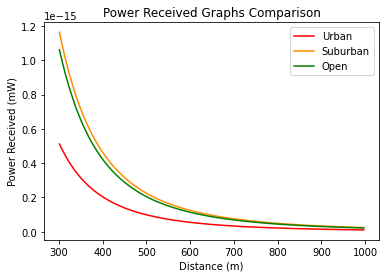

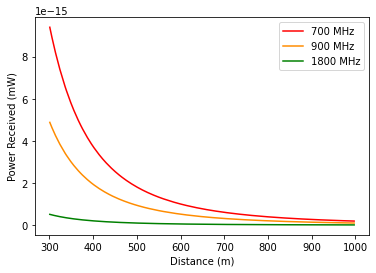

In [11]:
plt.figure()
plt.plot(df, Urbanf, color = 'red')
plt.plot(df, Suburbf, color = 'darkorange')
plt.plot(df, Openf, color = 'green')
plt.title('Power Received Graphs Comparison')
plt.xlabel('Distance (m)')
plt.ylabel('Power Received (mW)')
plt.legend(['Urban', 'Suburban', 'Open'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(df, Urbanf2, color = 'red')
plt.plot(df, Urbanf3, color = 'darkorange')
plt.plot(df, Urbanf, color = 'green')
plt.xlabel('Distance (m)')
plt.ylabel('Power Received (mW)')
plt.legend(['700 MHz', '900 MHz', '1800 MHz'], loc = 'upper right')
plt.show()

In [12]:
def snr(prx, sysband): 
  noise = -174 + 10*np.log10(sysband*1000000)
  noisen = noise*-1
  sigtono = prx/noisen

  return sigtono

In [13]:
Urbsnr = snr(Urbpow, sysband)
Suburbsnr = snr(Suburbpow, sysband)
Opensnr = snr(Openpow, sysband)

In [14]:
Urbsnrf = Urbsnr[np.argsort(d)]
Suburbsnrf = Suburbsnr[np.argsort(d)]
Opensnrf = Opensnr[np.argsort(d)]

In [15]:
Urbsnr2 = snr(Urbpow2, sysband)
Urbsnr3 = snr(Urbpow3, sysband)

In [16]:
Urbsnrf2 = Urbsnr2[np.argsort(d)]
Urbsnrf3 = Urbsnr3[np.argsort(d)]

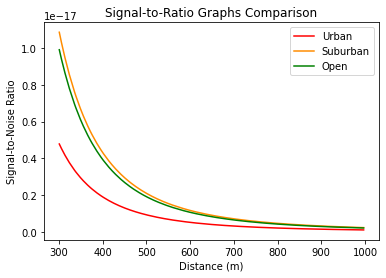

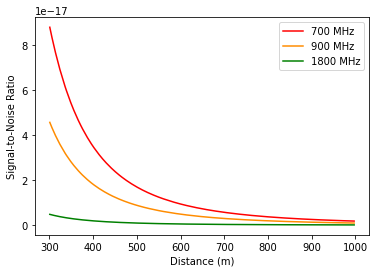

In [17]:
plt.figure()
plt.plot(df, Urbsnrf, color = 'red')
plt.plot(df, Suburbsnrf, color = 'darkorange')
plt.plot(df, Opensnrf, color = 'green')
plt.title('Signal-to-Ratio Graphs Comparison')
plt.xlabel('Distance (m)')
plt.ylabel('Signal-to-Noise Ratio')
plt.legend(['Urban', 'Suburban', 'Open'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(df, Urbsnrf2, color = 'red')
plt.plot(df, Urbsnrf3, color = 'darkorange')
plt.plot(df, Urbsnrf, color = 'green')
plt.xlabel('Distance (m)')
plt.ylabel('Signal-to-Noise Ratio')
plt.legend(['700 MHz', '900 MHz', '1800 MHz'], loc = 'upper right')
plt.show()

In [18]:
def ccap(sigtonor, sysband):
  cellcap = sysband*np.log2(1 + sigtonor)

  return cellcap

In [19]:
Urbcap = ccap(Urbsnr, sysband)
Suburbcap = ccap(Suburbsnr, sysband)
Opencap = ccap(Opensnr, sysband)

In [20]:
Urbcapf = Urbcap[np.argsort(d)]
Suburbcapf = Suburbcap[np.argsort(d)]
Opencapf = Opencap[np.argsort(d)]

In [21]:
Urbcap2 = ccap(Urbsnr2, sysband)
Urbcap3 = ccap(Urbsnr3, sysband)

In [22]:
Urbcapf2 = Urbcap2[np.argsort(d)]
Urbcapf3 = Urbcap3[np.argsort(d)]

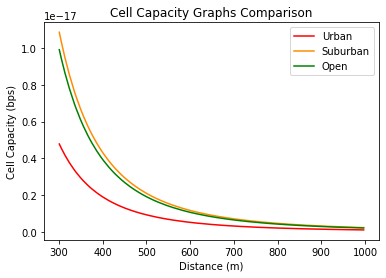

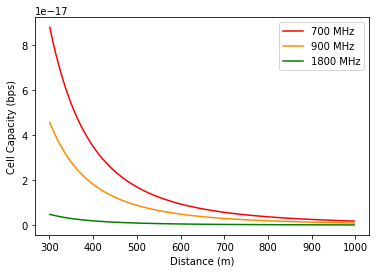

In [23]:
plt.figure()
plt.plot(df, Urbsnrf, color = 'red')
plt.plot(df, Suburbsnrf, color = 'darkorange')
plt.plot(df, Opensnrf, color = 'green')
plt.title('Cell Capacity Graphs Comparison')
plt.xlabel('Distance (m)')
plt.ylabel('Cell Capacity (bps)')
plt.legend(['Urban', 'Suburban', 'Open'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(df, Urbsnrf2, color = 'red')
plt.plot(df, Urbsnrf3, color = 'darkorange')
plt.plot(df, Urbsnrf, color = 'green')
plt.xlabel('Distance (m)')
plt.ylabel('Cell Capacity (bps)')
plt.legend(['700 MHz', '900 MHz', '1800 MHz'], loc = 'upper right')
plt.show()